# Rent Prediction in Hyderabad

Rent prices from over 10,000 different listings in a real estate website makaan.com in Hyderabad, India, have been scraped and stored in a csv file.The goal of this project is to create a model to predict rent prices in Hyderabad based on certain parameters and to deploy this model on a web app built with flask. This article details exploring the dataset and training the model.

## Imports

In [850]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set_theme()

## Loading and Exploring Dataset

The following Dataset has been scraped from Makaan.com, a popular real estate website. 

In [851]:
df = pd.read_csv('hyd_rents')
df.drop('Unnamed: 0',inplace=True,axis = 1)

In [852]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10980 entries, 0 to 10979
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   latitude       10980 non-null  float64
 1   longitude      10980 non-null  float64
 2   bedrooms       10980 non-null  int64  
 3   seller         10980 non-null  object 
 4   property_type  10980 non-null  object 
 5   locality       10980 non-null  object 
 6   suburb         10980 non-null  object 
 7   area           10980 non-null  object 
 8   units          10980 non-null  object 
 9   rent           10980 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 857.9+ KB


Area describes the area of the property, and it is not in int or float format, so we must do the needful conversion, and there is no missing or null data

In [853]:
df['area']= df['area'].apply(lambda x: int(x.replace(',','')))

In [854]:
df.head(10)

,latitude,longitude,bedrooms,seller,property_type,locality,suburb,area,units,rent
0,17.479078,78.320862,1,OWNER,Apartment,Serilingampally,Hyderabad West,320,sqft,6720
1,17.395611,78.434128,2,OWNER,Apartment,Dilsukh Nagar,Hyderabad Central,1500,sqft,14500
2,17.375957,78.537056,2,OWNER,Apartment,Dilsukh Nagar,Hyderabad Central,1050,sqft,13000
3,17.462992,78.357643,1,OWNER,Apartment,Kondapur,Hyderabad West,150,sqft,10000
4,17.422832,78.458504,2,OWNER,Apartment,Somajiguda,Hyderabad Central,1000,sqft,18000
5,17.420919,78.549530,2,OWNER,Apartment,Nacharam,Secunderabad,800,sqft,10500
6,17.421917,78.647476,2,OWNER,Apartment,Pocharam,ORR South,1652,sqft,20000
7,17.488024,78.402359,1,OWNER,Independent House,Kukatpally,Hyderabad West,1500,sqft,9000
8,17.505535,78.470619,2,OWNER,Independent House,Suchitra,Other,1000,sqft,18000
9,17.364771,78.400681,2,OWNER,Apartment,Manikonda,Hyderabad West,1250,sqft,16000


In [855]:
df.tail()

,latitude,longitude,bedrooms,seller,property_type,locality,suburb,area,units,rent
10975,17.390228,78.340256,3,AGENT,Apartment,Kokapeta Village,Other,1300,sqft,32000
10976,17.440525,78.392296,3,AGENT,Apartment,Madhpal,Other,2000,sqft,34000
10977,17.439516,78.496460,1,AGENT,Independent Floor,Shivaji Nagar,Other,600,sqft,7500
10978,17.494793,78.399643,1,AGENT,Apartment,Kukatpally,Hyderabad West,1050,sqft,8000
10979,17.465866,78.352112,2,AGENT,Apartment,Kondapur,Hyderabad West,1800,sqft,39000


In [856]:
df.describe()

,latitude,longitude,bedrooms,area,rent
count,10980.000000,10980.000000,10980.000000,10980.000000,10980.000000
mean,17.443665,78.408609,2.078506,1206.200820,19364.355464
std,0.464925,0.255672,0.914225,758.743446,19949.582838
min,11.949820,72.455009,1.000000,3.000000,1500.000000
25%,17.414200,78.357643,1.000000,800.000000,10000.000000
50%,17.449215,78.391113,2.000000,1100.000000,15000.000000
75%,17.469475,78.458183,3.000000,1440.000000,23000.000000
max,28.702532,88.418236,12.000000,12000.000000,600000.000000


The mean rent is 20,000 Rupees and the standard deviation is roughly the same as the mean rent. Majority of the rents seem to be under 30,000 Rupees. We shall later see the relavent plots to visualize this data

## Visualization of Univariate Data

First we have the localitis, which have a large number of values which can't accurately be represented in a plot, so we will see the count in numerals

In [857]:
df['locality'].value_counts()

Kondapur                                      1382
Madhapur                                       624
Kukatpally                                     608
Manikonda                                      453
Gachibowli                                     414
Begumpet                                       339
Miyapur                                        277
Ameerpet                                       231
Hitech City                                    219
Chandanagar                                    165
Banjara Hills                                  163
Nizampet                                       146
Anjaiah Nagar                                  134
Mehdipatnam                                    132
Sanjeeva Reddy Nagar                           126
Gowlidody                                      113
Nallagandla Gachibowli                         107
Nallakunta                                     102
Somajiguda                                     101
Serilingampally                

The most rent data is available from the IT corridoor area of the city, with the older parts of the city having fewer listings

C:\Users\skoli\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Suburb')

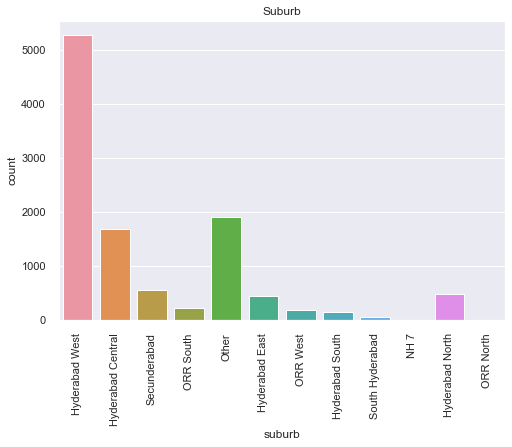

In [858]:
sns.countplot(df['suburb'])
plt.xticks(rotation=90)
plt.title("Suburb")

As seen in the locations table, the western part of Hyderabad, i.e the IT corridoor has more listings

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

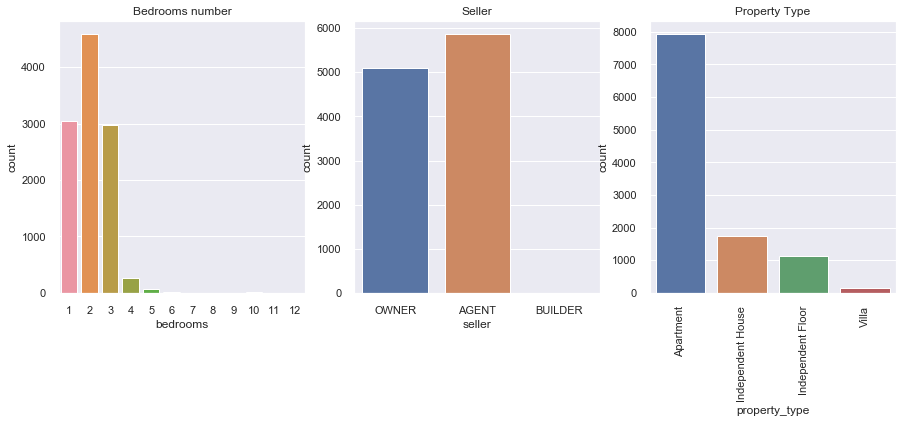

In [862]:
#bedrooms, seller, property type
fig, axes = plt.subplots(1,3, figsize = (15,5))
sns.countplot(x=df['bedrooms'], ax = axes[0])
sns.countplot(x=df['seller'], ax = axes[1])
sns.countplot(x=df['property_type'], ax = axes[2])
axes[0].set_title('Bedrooms number')
axes[1].set_title('Seller')
axes[2].set_title('Property Type')
plt.sca(axes[2])
plt.xticks(rotation=90)


Majority of the houses lie between 1-2 bedroom range, Agents are the most common sellers, and Apartments are the most common property up for sale, with villa's being the rarest

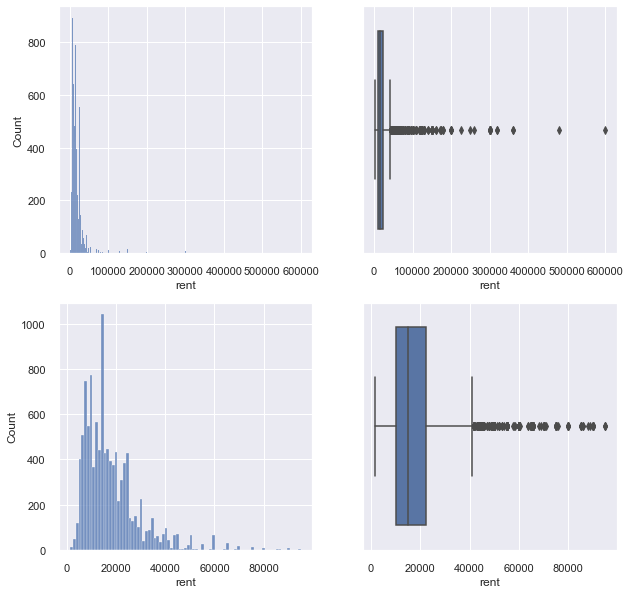

In [861]:
fig,axes = plt.subplots(2,2,figsize = (10,10))
sns.histplot(x=df['rent'], ax = axes[0,0])
sns.boxplot(x=df['rent'],ax = axes[0,1])
sns.histplot(x=df[df['rent']<100000]['rent'],ax = axes[1,0])
sns.boxplot(x=df[df['rent']<100000]['rent'],ax = axes[1,1])

From the above plots it is clear that most of the data lies under 1 lakh, and concentrated mostly less than 45000

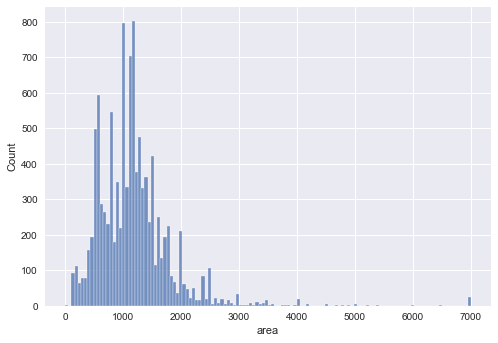

In [946]:
sns.histplot(x=df[df['rent']<100000]['area'])

## Multivariate Visualisation and Geographocal data Visualisation

Text(0.5, 1.0, 'Plotting the Coordinates')

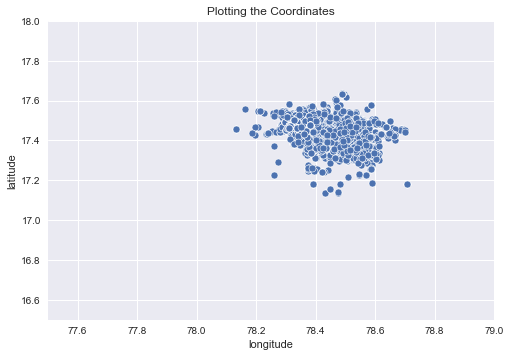

In [923]:
## fig,axes = plt.subplots()
sns.scatterplot(x='longitude',y='latitude',data=df)
plt.xlim([77.5, 79])
plt.ylim([16.5,18])
plt.title('Plotting the Coordinates')


Majority of the coordinates lie within the latitudes 17.1-17.7N and 78.1-78.8W. All other data is too far away from the main group of homes to be considered in our model, therefore for convinience we remove them from the dataset

In [864]:
df_shortened = df[(df['latitude']>17.1) & (df['latitude']<17.7) & (df['longitude']>78.1) & (df['longitude']<78.8)]
df = df_shortened
df

,latitude,longitude,bedrooms,seller,property_type,locality,suburb,area,units,rent
0,17.479078,78.320862,1,OWNER,Apartment,Serilingampally,Hyderabad West,320,sqft,6720
1,17.395611,78.434128,2,OWNER,Apartment,Dilsukh Nagar,Hyderabad Central,1500,sqft,14500
2,17.375957,78.537056,2,OWNER,Apartment,Dilsukh Nagar,Hyderabad Central,1050,sqft,13000
3,17.462992,78.357643,1,OWNER,Apartment,Kondapur,Hyderabad West,150,sqft,10000
4,17.422832,78.458504,2,OWNER,Apartment,Somajiguda,Hyderabad Central,1000,sqft,18000
...,...,...,...,...,...,...,...,...,...,...
10975,17.390228,78.340256,3,AGENT,Apartment,Kokapeta Village,Other,1300,sqft,32000
10976,17.440525,78.392296,3,AGENT,Apartment,Madhpal,Other,2000,sqft,34000
10977,17.439516,78.496460,1,AGENT,Independent Floor,Shivaji Nagar,Other,600,sqft,7500
10978,17.494793,78.399643,1,AGENT,Apartment,Kukatpally,Hyderabad West,1050,sqft,8000


### Multivariate Plotting

Since majority if the data is within the rent of Rs.45000,let us constrain our plot to these data points. This will allow for more accurate representation of the data 

Text(0.5, 1.0, 'Rent for size of home')

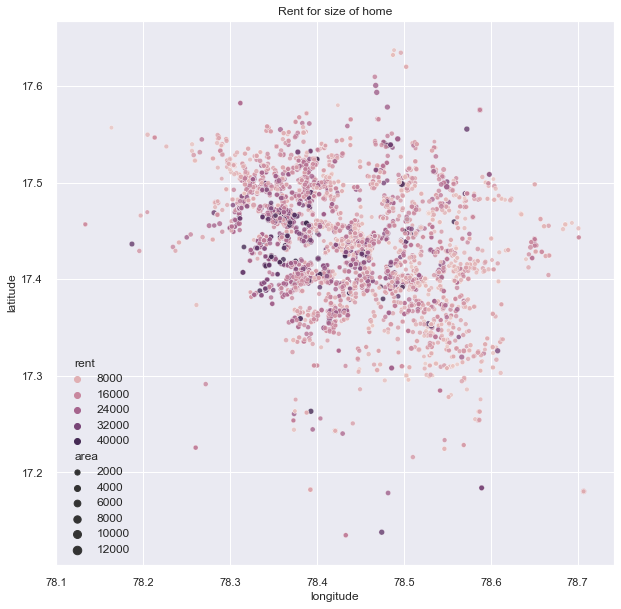

In [865]:

df_forplot = df[df['rent']<45000]
fig,axes = plt.subplots(figsize=(10,10))
sns.scatterplot(x='longitude',y='latitude',data=df_forplot, hue = df_forplot['rent'], size = df['area'], alpha = 0.8)
plt.title('Rent for size of home')


The Entire IT strip and the Jubilee Hills Area costs higher rent than the rest of the Map as verifiable from the darker markers in the plot

Text(0.5, 1.0, 'Rent vs No. of bedrooms')

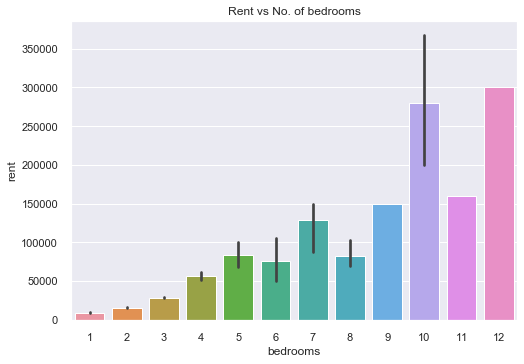

In [867]:
sns.barplot(x="bedrooms", y="rent", data=df)
plt.title("Rent vs No. of bedrooms")

Text(0.5, 1.0, 'Rent vs Suburb')

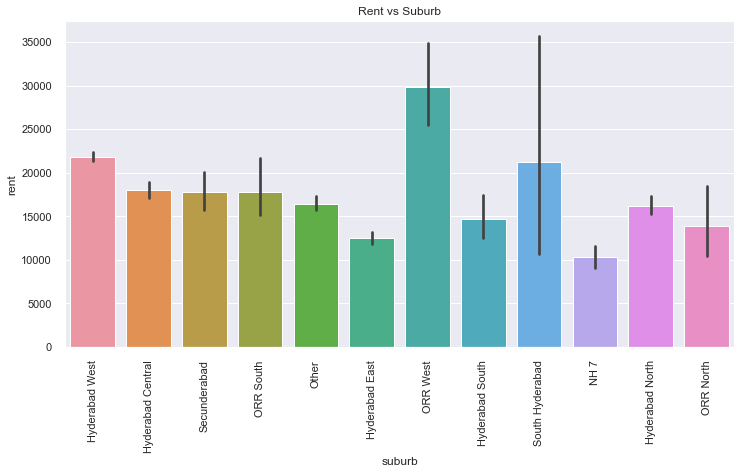

In [868]:
fid,axes = plt.subplots(figsize = (12,6))
sns.barplot(x="suburb", y="rent", data=df)
plt.xticks(rotation=90)
plt.title('Rent vs Suburb')

Text(0.5, 1.0, 'Rent per property Type')

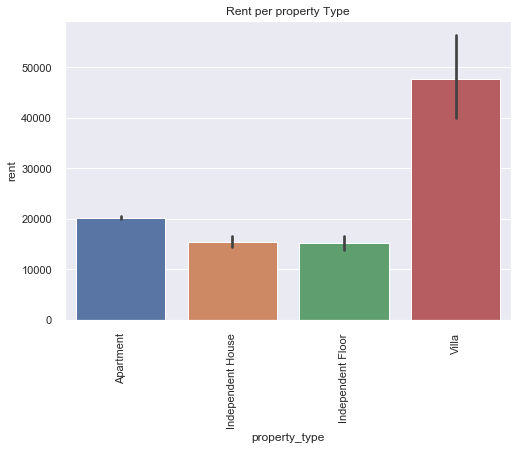

In [869]:
sns.barplot(x="property_type", y="rent", data=df)
plt.xticks(rotation=90)
plt.title("Rent per property Type")

Text(0.5, 1.0, 'rent vs type of seller')

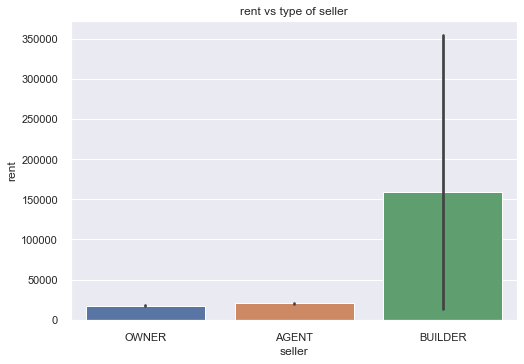

In [870]:
sns.barplot(x="seller", y="rent", data=df)
plt.title('rent vs type of seller')

Text(0.5, 1.0, 'Rent per Area')

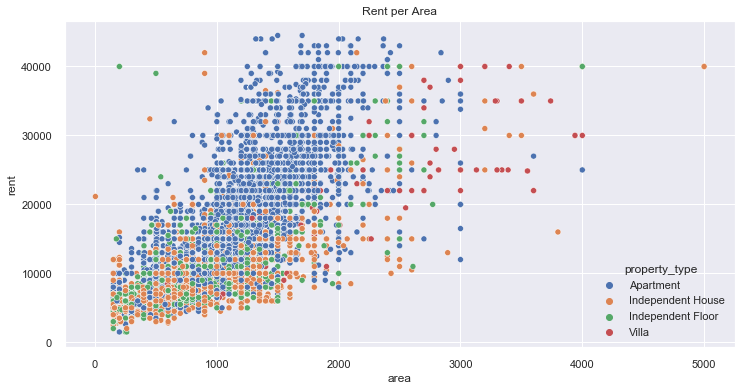

In [871]:
fig,ax = plt.subplots(figsize = (12,6))
sns.scatterplot(x='area',y='rent',hue= 'property_type',data = df_forplot)
plt.title('Rent per Area')

Text(0.5, 1.0, 'Distibution of Rent')

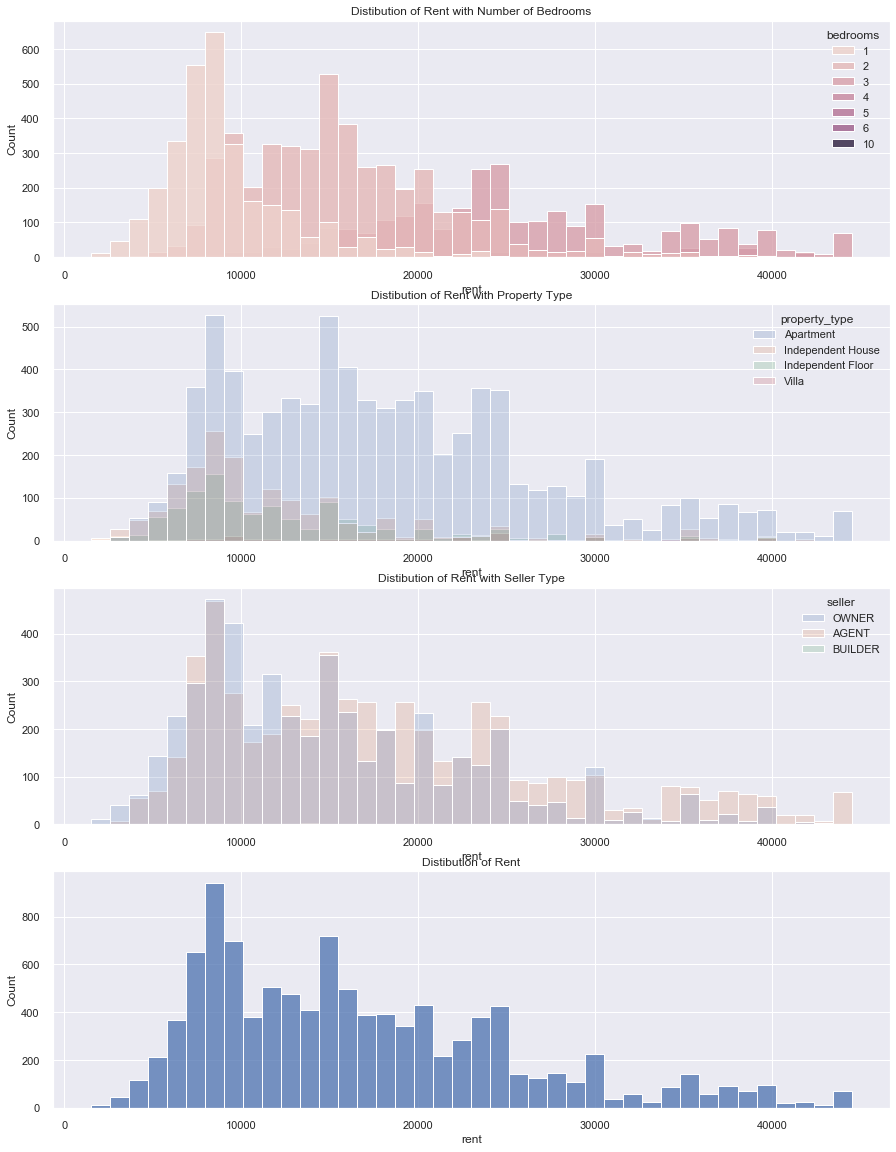

In [872]:
fig,ax = plt.subplots(4,1,figsize = (15,20))
sns.histplot(data = df_forplot, x= "rent",hue='bedrooms',alpha=0.8,ax=ax[0])
sns.histplot(data = df_forplot, x= "rent",hue='property_type',alpha=0.2,ax=ax[1])
sns.histplot(data = df_forplot, x= "rent",hue='seller',alpha=0.2,ax=ax[2])
sns.histplot(data = df_forplot, x= "rent",ax=ax[3])
ax[0].set_title('Distibution of Rent with Number of Bedrooms')
ax[1].set_title('Distibution of Rent with Property Type')
ax[2].set_title('Distibution of Rent with Seller Type')
ax[3].set_title('Distibution of Rent')



Text(0.5, 1, 'Heatmap for Correlations')

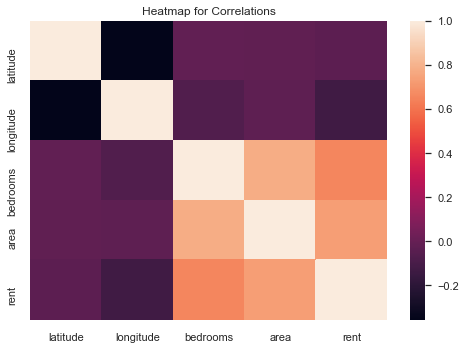

In [873]:
sns.heatmap(df.corr())
plt.title('Heatmap for Correlations')

Observations:
1. Villas are a lot more expensive whereas the remaining are on par
2. Number of bedrooms and the are are very highly correlated to the rent price
3. Removal of outliers in highly correlated data can improve the model

## Data Preperation

In [904]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
X = df.drop('rent',axis=1)
y=df['rent']
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.33, random_state=42)
num_pipeline = Pipeline([('std_scaler',StandardScaler())])
cat_pipeline = Pipeline([('one_hot',OneHotEncoder())])

num_attribs = ['latitude','longitude','bedrooms','area']
cat_attribs=['seller','property_type','locality','suburb']
full_pipeline = ColumnTransformer([('num',num_pipeline,num_attribs),('cat',cat_pipeline,cat_attribs),])
X_prepared = full_pipeline.fit_transform(X_train)

The numerical data has been scaled and the categorical data has been one-hot encoded in scipy sparse matrices. The data is now ready for machine learning algorithms

## Basic Models


In [994]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
lin_reg = LinearRegression()
tree_reg = DecisionTreeRegressor()
from sklearn.model_selection import cross_val_score

### Linear Regression Model

In [906]:
scores = cross_val_score(lin_reg,Xr_prepared,yr_train,scoring = 'neg_mean_absolute_error',cv=5)
np.mean(-scores)

6316.138619560091

Note: We have chosen the error metric as mean absolute error (MAE) rather than the more widely used mean square error(MSE) because the number of outliers are extremely rare. In our data set, 99.2% of the data lies below a rent of 1 lakh rupees, thus the outliers are rare and also logically speaking, we do not care much about a variation in 5-10k of rent when the rent price is extremely high. MSE punishes the outliers a lot more than MAE by virtue of squaring, so MAE is more useful for our needs

In the above linear regression model, the MAE is Rs. 6242, which is significant in terms of our mean rent, which is Rs.20000. Let us plot a learning curve to verify if our model is overfitting or underfitting, so we can choose a more complex model or do some feature extraction to solve overfitting.

### Learning Curve

The exact solution is  x = 0                              
The exact solution is  x = 0                              
The exact solution is  x = 0                              
The exact solution is  x = 0                              
The exact solution is  x = 0                              


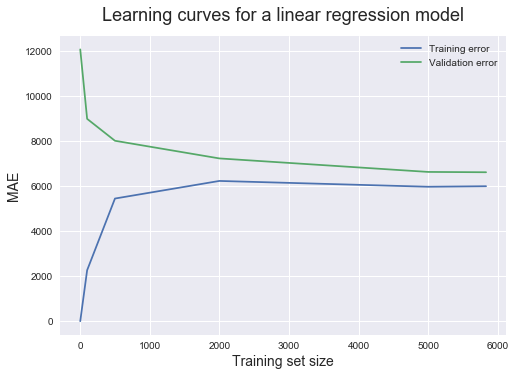

In [907]:
from sklearn.model_selection import learning_curve
train_sizes = [1, 100, 500, 2000, 5000, 5833]
train_sizes, train_scores, validation_scores = learning_curve( estimator = LinearRegression(),
      X = X_prepared, y = y_train, train_sizes = train_sizes, cv = 5, scoring = 'neg_mean_absolute_error')
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1 )
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MAE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()

From the curve, it is clear that the model is underfitting, as the training error and the cross validation error comes very close to each other and are both relatively high. Let us try a more complex model

### Decision Tree

In [909]:
scores = cross_val_score(tree_reg,Xr_prepared,yr_train,scoring = 'neg_mean_absolute_error',cv=5)
np.mean(-scores)

3151.876412630821

As we predicted from the learning curve, the error has halved with the use of a more complex model

## Categorizing the locations using Kmeans and using Random Forests 

One observation is that the longitudes and latitudes may throw the model off by themsleves as the rent proce is not correlated well with the latitudes and longitudes. Above this, although the rent prices depend largely on the location, the large number of location values (above 400) may throw the model off, especially because the least frequent locations have very few data points in them. Also, in the long run, when we deploy the model, new datapoints need not consist only of the localities mentioned in the training data. Therefore, to solve these problems, lets classify the location data into clusters based on distance using the  kmeans algorithm.

In [934]:
from sklearn.cluster import KMeans
coords= list(zip(df['latitude'],df['longitude']))
kmeans = KMeans(n_clusters = 100, random_state=0) #arbitrary number, we shall optimise later
coords = kmeans.fit_predict(coords)
df['cluster_center']=coords

In [936]:
df['cluster_center']

0        42
1        93
2        95
3        36
4        90
         ..
10975    51
10976    14
10977    48
10978    24
10979    36
Name: cluster_center, Length: 10884, dtype: int32

In [949]:
X = df.drop('rent',axis=1)
y=df['rent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
num_attribs = ['latitude','longitude','bedrooms','area']
cat_attribs=['seller','property_type','cluster_center']
full_pipeline = ColumnTransformer([('num',num_pipeline,num_attribs),('cat',cat_pipeline,cat_attribs),])
X_prepared = full_pipeline.fit_transform(X_train)
scores = cross_val_score(rfr,X_prepared,y_train,scoring = 'neg_mean_absolute_error',cv=5)
np.mean(-scores)

2994.618413443839

By using random forests and also categorizing the locations to eliminate the localities parameter for future deployment, we get a slight improvement in performance. Now we should optimise the model. Before we do that, lets out the above pipeline into a function for reuse.

In [967]:
X = df.drop('rent',axis=1)
y=df['rent']    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
def get_mae_score(model,X_train,y_train, num_attribs = ['latitude','longitude','bedrooms','area'], cat_attribs=['seller','property_type','cluster_center']):
    full_pipeline = ColumnTransformer([('num',num_pipeline,num_attribs),('cat',cat_pipeline,cat_attribs),])
    X_prepared = full_pipeline.fit_transform(X_train)
    scores = cross_val_score(model,X_prepared,y_train,scoring = 'neg_mean_absolute_error',cv=5)
    print(np.mean(-scores))

In [968]:
get_mae_score(rfr,X_train,y_train)

2981.756279145925


## Removal of outliers

Removal of outliers in the highly correlated classes works to improve the model greatly. Here lets use the interquartile range method for removal of outliers

In [969]:
def find_limits(data):    
    q25,q75 = np.percentile(data, 25), np.percentile(data, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    iqr = q75 - q25
    print('iqr: {}'.format(iqr))
    cut_off = iqr * 1.5
    lower_limit, upper_limit = q25 - cut_off, q75 + cut_off
    print('lower limit: {} | upper limit: {}'.format(lower_limit, upper_limit)) 
    

In [970]:
find_limits(df['bedrooms'])

Quartile 25: 1.0 | Quartile 75: 3.0
iqr: 2.0
lower limit: -2.0 | upper limit: 6.0


In [971]:
find_limits(df['area'])

Quartile 25: 800.0 | Quartile 75: 1440.0
iqr: 640.0
lower limit: -160.0 | upper limit: 2400.0


Lets remove the rows where the number of bedrooms exceeds 6 and area exceeds 2400 sft from the training set

In [977]:
X_train['labels'] = y_train
X_train = X_train[(X_train['bedrooms']<=6) & (X_train['area']<=2400)]
y_train = X_train['labels']
X_train.drop('labels', axis =1, inplace = True)
get_mae_score(rfr,X_train,y_train)

2229.337620671335


## Number of clusters

In [973]:
num_clusters = [10,25,50,75,100,125,150]
for clusters in num_clusters:
    coords= list(zip(df['latitude'],df['longitude']))
    kmeans = KMeans(n_clusters = 100, random_state=0) #arbitrary number, we shall optimise later
    coords = kmeans.fit_predict(coords)
    df['cluster_center']=coords
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    X_train['labels'] = y_train
    X_train = X_train[(X_train['bedrooms']<=6) & (X_train['area']<=2400)]
    y_train = X_train['labels']
    X_train.drop('labels', axis =1, inplace = True)
    get_mae_score(rfr, X_train, y_train)

C:\Users\skoli\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


2219.103005182958


C:\Users\skoli\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


2224.1304804654665


C:\Users\skoli\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


2213.221986654262


C:\Users\skoli\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


2220.104527371127


C:\Users\skoli\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


2220.5450159704465


C:\Users\skoli\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


2224.1197615465526


C:\Users\skoli\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


2220.0002900441764


The number of clusters has no significant effect on the performance of the model, so lets keep it at the original value of 100 clusters

## Calculating error for test data

In [1062]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train['labels'] = y_train
X_train = X_train[(X_train['bedrooms']<=6) & (X_train['area']<=2400)]
y_train = X_train['labels']
X_train.drop('labels', axis =1, inplace = True)
X_prepared = full_pipeline.fit_transform(X_train)
rfr.fit(X_prepared,y_train)


C:\Users\skoli\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


RandomForestRegressor(n_estimators=200)

In [1063]:
X_test_prepared = full_pipeline.transform(X_test)

preds = rfr.predict(X_test_prepared)

from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,preds)

3221.344078901339

## Optimising with Grid Search

In [1038]:
from sklearn.model_selection import GridSearchCV
# Number of trees in random forest
n_estimators = [50,100,150,200]
param_grid = {'n_estimators': n_estimators}

In [1039]:
rf = RandomForestRegressor()
rf_grid = GridSearchCV(estimator = rf, param_grid = param_grid,cv = 5, verbose=0, scoring = 'neg_mean_absolute_error')
X = df.drop('rent',axis=1)
y=df['rent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
num_attribs = ['latitude','longitude','bedrooms','area']
cat_attribs=['seller','property_type','cluster_center']
full_pipeline = ColumnTransformer([('num',num_pipeline,num_attribs),('cat',cat_pipeline,cat_attribs),])
remove_outliers(X_train,y_train)
X_prepared = full_pipeline.fit_transform(X_train)
rf_grid.fit(X_prepared,y_train)

C:\Users\skoli\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\skoli\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [50, 100, 150, 200]},
             scoring='neg_mean_absolute_error')

In [1040]:
rf_grid.best_params_

{'n_estimators': 200}

In [1041]:
rf_grid.best_score_

-2972.6964510102543

## Final Test with optimised rfr model

In [1061]:
rfr = RandomForestRegressor(n_estimators = 200)
rfr.fit(X_prepared,y_train)
X_test_prepared = full_pipeline.transform(X_test)
preds = rfr.predict(X_test_prepared)
mean_absolute_error(y_test,preds)


3189.9618849477206

## Data pipeline start to end on full dataset
The following function takes in the scraped dataframe and applies all neccessary transformations on the data. It then trains the model and returns the random forest model, the clusterer, and also the data transformation pipeline 


In [1069]:

def model_maker(df):
    import pandas as pd
    import numpy as np
    from sklearn.preprocessing import OneHotEncoder, StandardScaler
    from sklearn.pipeline import Pipeline
    from sklearn.compose import ColumnTransformer
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.cluster import KMeans
    #Remove outliers
    df['area']= df['area'].apply(lambda x: int(x.replace(',','')))
    df_shortened = df[(df['latitude']>17.1) & (df['latitude']<17.7) & (df['longitude']>78.1) & (df['longitude']<78.8) & (df['bedrooms']<=6) & (df['area']<=2400)]
    df = df_shortened
    #clustering
    coords= list(zip(df['latitude'],df['longitude']))
    kmeans = KMeans(n_clusters = 100, random_state=0) #arbitrary number, we shall optimise later
    coords = kmeans.fit_predict(coords)
    df['cluster_center']=coords
    df = df[['latitude','longitude','bedrooms','area','seller','property_type','cluster_center','rent']]
    #training
    X = df.drop('rent',axis=1)
    y=df['rent']
    num_pipeline = Pipeline([('std_scaler',StandardScaler())])
    cat_pipeline = Pipeline([('one_hot',OneHotEncoder())])
    num_attribs = ['latitude','longitude','bedrooms','area']
    cat_attribs=['seller','property_type','cluster_center']
    full_pipeline = ColumnTransformer([('num',num_pipeline,num_attribs),('cat',cat_pipeline,cat_attribs),])
    X_prepared = full_pipeline.fit_transform(X)
    rfr = RandomForestRegressor(n_estimators = 200)
    rfr.fit(X_prepared,y)
    mylist = [kmeans,rfr,full_pipeline]
    return mylist

    
    

In [1067]:
model = model_maker(df)

C:\Users\skoli\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Saving model for export

In [1070]:
import joblib

In [1071]:
joblib.dump(model,'rent_model.sav')

['rent_model.sav']